In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

dir_data = './Data/home-credit-default-risk/'

In [4]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./Data/home-credit-default-risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [10]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut =np.linspace(20,70,11)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head

(35.0, 40.0]    9087
(40.0, 45.0]    8854
(30.0, 35.0]    8447
(45.0, 50.0]    7496
(50.0, 55.0]    7488
(55.0, 60.0]    6971
(25.0, 30.0]    6967
(60.0, 65.0]    5852
(20.0, 25.0]    2629
(65.0, 70.0]    1708
Name: YEARS_BINNED, dtype: int64


<bound method NDFrame.head of        TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0           1        9461    25.920548  (25.0, 30.0]
1           0       16765    45.931507  (45.0, 50.0]
2           0       19046    52.180822  (50.0, 55.0]
3           0       19005    52.068493  (50.0, 55.0]
4           0       19932    54.608219  (50.0, 55.0]
5           0       16941    46.413699  (45.0, 50.0]
6           0       13778    37.747945  (35.0, 40.0]
7           0       18850    51.643836  (50.0, 55.0]
8           0       20099    55.065753  (55.0, 60.0]
9           0       14469    39.641096  (35.0, 40.0]
10          0       10197    27.936986  (25.0, 30.0]
11          0       20417    55.936986  (55.0, 60.0]
12          0       13439    36.819178  (35.0, 40.0]
13          0       14086    38.591781  (35.0, 40.0]
14          0       14583    39.953425  (35.0, 40.0]
15          0        8728    23.912329  (20.0, 25.0]
16          0       12931    35.427397  (35.0, 40.0]
17          0   

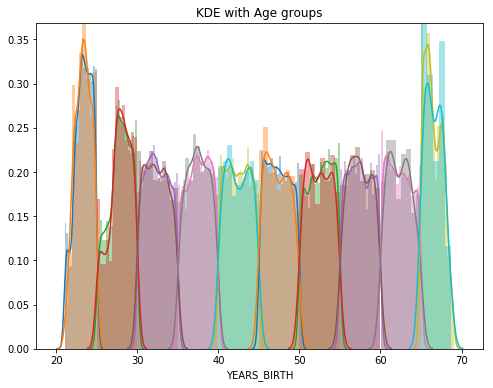

In [19]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = np.unique(age_data['YEARS_BINNED'])

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [20]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.119057,8522.294789,23.348753
"(25.0, 30.0]",0.112387,10158.558777,27.831668
"(30.0, 35.0]",0.101575,11851.445720,32.469714
"(35.0, 40.0]",0.092110,13711.448553,37.565612
"(40.0, 45.0]",0.076689,15499.666140,42.464839
"(45.0, 50.0]",0.073773,17323.166222,47.460729
"(50.0, 55.0]",0.065304,19192.172409,52.581294
"(55.0, 60.0]",0.054655,20985.264668,57.493876
"(60.0, 65.0]",0.053486,22779.232570,62.408856


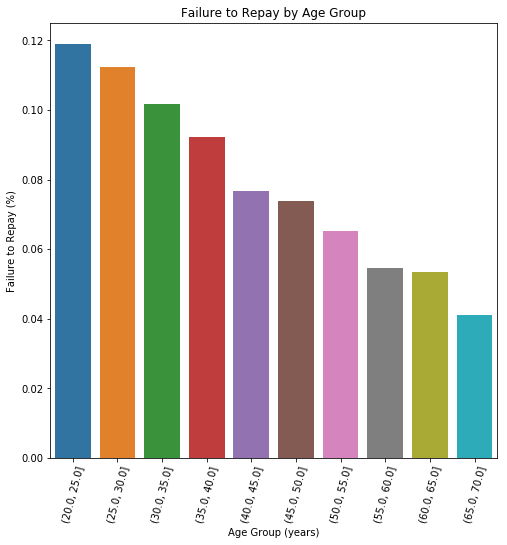

In [22]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = np.unique(age_data['YEARS_BINNED'])

py =  age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');